In [1]:
import itertools
import numpy as np
import pandas as pd
import sklearn.mixture as mix

from scipy import linalg
import matplotlib.pyplot as plt
import pickle

In [2]:
#Reading in the data as Pandas df
df_conti_ep = pd.read_csv('contiform_effectivepower.csv')
df_filler_pf = pd.read_csv('filler_PerformanceFactor.csv')
df_filler_t = pd.read_csv('filler_Temperature.csv')
df_labeller_cs = pd.read_csv('labeller_CurrentSpeed.csv')
df_labeller_ep = pd.read_csv('labeller_EffectivePower.csv')
df_mixer_ep = pd.read_csv('mixer_EffectivePower.csv')
df_mixer_wf = pd.read_csv('mixer_WaterFlow.csv')
df_pet_cs = pd.read_csv('petview_CurrentSpeed.csv')


Y = [df_conti_ep['EffectivePower'].values[:], df_filler_pf['PerformanceFactor'].values[:], df_filler_t['Temperature'].values[:],
             df_labeller_cs['CurrentSpeed'].values[:],df_labeller_ep['EffectivePower'].values[:],
             df_mixer_ep['EffectivePower'].values[:], df_mixer_wf['WaterFlow'].values[:], df_pet_cs['CurrentSpeed'].values[:] ]
df_filler_pf

,PerformanceFactor,PerformanceFactor_qc,_time
0,1.752066,NaN,2018-05-18T21:59:28Z
1,0.000000,NaN,2018-05-18T21:59:29Z
2,33.057851,NaN,2018-05-18T21:59:31Z
3,38.671074,NaN,2018-05-18T21:59:34Z
4,45.153719,NaN,2018-05-18T21:59:35Z
5,50.209917,NaN,2018-05-18T21:59:36Z
6,56.692562,NaN,2018-05-18T21:59:37Z
7,62.527273,NaN,2018-05-18T21:59:38Z
8,68.231405,NaN,2018-05-18T21:59:39Z
9,74.066116,NaN,2018-05-18T21:59:40Z


In [10]:
#reshape
for s in Y:
    s= s.reshape(-1,1)
assumed_clusters = 14
GMM=[]
big= []
aic= []
iters = []
cluster = Y[4]
# for cluster in Y:
#     GMM=[]
#     big= []
#     aic= []
for cluster in Y:
    GMM.append(mix.GaussianMixture(n_components=4, covariance_type='full').fit(cluster.reshape(-1,1)))
    big.append( GMM[-1].bic(cluster.reshape(-1,1)))
    aic.append(GMM[-1].aic(cluster.reshape(-1,1)))
iters.append([GMM,big,aic])


In [4]:
print(len(big))
print(len(aic))
print(range(1,assumed_clusters))

13
13
range(1, 14)


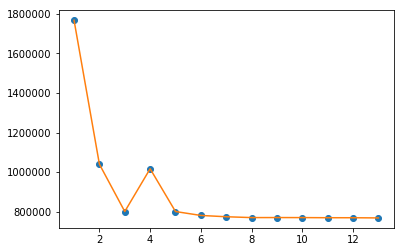

In [5]:
plt.plot(range(1,assumed_clusters),big,'o')
plt.plot(range(1,assumed_clusters),aic)

plt.show()


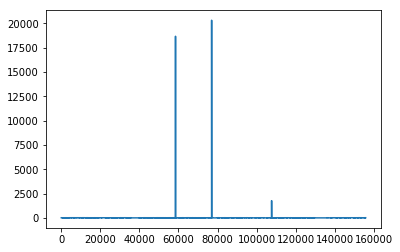

In [6]:
plt.plot(range(len(cluster)),cluster)
plt.show()

In [7]:
labels =GMM[4].predict(cluster.reshape(-1,1))

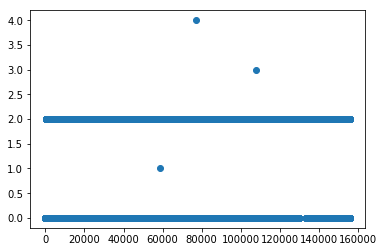

In [8]:
plt.plot(range(len(labels)),labels,'o')
plt.show()


In [11]:
filename = 'clustermodel.sav'
pickle.dump(GMM, open(filename, 'wb'))

In [37]:
import sklearn.linear_model as model

In [46]:
models = []

for Data in Y:
    Reg = model.LinearRegression()
    y=np.transpose(np.linspace(0,len(Data),len(Data)))
    models.append(Reg.fit(X=Data.reshape(-1,1),y=y))
